# EDA

In [1]:
#import necessary libraries

#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# from matplotlib.ticker import PercentFormatter
# plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
# plt.rcParams["figure.facecolor"]= "w"
# pd.plotting.register_matplotlib_converters()

#round all floats to 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#loading data into DataFrame
df_housing = pd.read_csv('data/King_County_House_prices_dataset.csv')

# # as column 'condition' is truncated in the display, disable column truncation
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.width', None) 
# pd.set_option('display.max_colwidth', -1)

In [3]:
#examining the data
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
# Check for duplicates - no duplicates!
df_housing.duplicated().value_counts()

False    21597
dtype: int64

In [5]:
df_housing.shape

(21597, 21)

In [6]:
df_housing.info()
#21597 entries, 21 columns
# there are NaN entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# how is the data indexed?
# standard numerical indexes starting at 0 with step=1, last index = 21596
df_housing.index

RangeIndex(start=0, stop=21597, step=1)

In [8]:
# check data types in data frame
#df_housing.dtypes

In [9]:
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Observations:
1. There is an outlier 33 in the bedrooms column.
1. There might be an outlier 8 in the bathrooms column.
1. What is the grading system?
1. what does 'view' mean?
1. How is the condition rated?
2. Missing values in the waterfront, view, yr_renovated columns
1. sqft_basement has non-numerical entries (e.g. ?)
5. The date column is in string format and needs to be changed to datetime
8. df.describe is not of much help as it doesn't show columns with missing data (NaN)
1. column names are already in Snake Case, no renaming necessary
1. What are half floors?
1. What are .25 bathrooms?

In [10]:
#look at outlier bedrooms
df_housing.query("bedrooms==33")
#conclusion: does not match size of house, faulty data, line should be removed

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0.000,0.000,...,7,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


In [11]:
df_housing.query("bedrooms==33").index

Int64Index([15856], dtype='int64')

In [12]:
#remove line with 33 bedrooms
df_housing.drop(df_housing.query("bedrooms==33").index, inplace=True)
# reset index inplace
df_housing.reset_index(inplace=True, drop=True)

In [13]:
df_housing.shape

(21596, 21)

In [14]:
#look at outlier bathrooms
df_housing.query("bathrooms==8")
#conclusion: matches large number of bedrooms and very high price, data should remain in the data set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,13,8570,3480.0,1910,1987.000,98102,47.630,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.000,7,8.000,13540,307752,3.000,0.000,4.000,...,12,9410,4130.0,1999,0.000,98053,47.667,-121.986,4850,217800


In [15]:
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,19220.000,21533.000,21596.000,21596.000,21596.000,21596.000,17754.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,2080.343,15099.830,1.494,0.008,0.234,3.410,7.658,1788.632,1971.001,83.641,98077.951,47.560,-122.214,1986.651,12758.657
std,2876764127.563,367376.019,0.904,0.769,918.122,41413.549,0.540,0.087,0.766,0.650,1.173,827.763,29.375,399.957,53.514,0.139,0.141,685.232,27275.018
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049166.750,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930470.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308950385.000,645000.000,4.000,2.500,2550.000,10685.500,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [16]:
# change "date" dtype to datetime with format %Y/%m/%d
df_housing['date'] = pd.to_datetime(df_housing['date'], format='%m/%d/%Y')

In [17]:
# How to display only the year???
# change "yr_built" dtype to datetime with format %Y
# df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'], format='%Y')

In [18]:
# how to convert yr_renovated? wrong format 0, NaN
# change "yr_renovated" dtype to datetime with format %Y
# not relevant for Larry!
#df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], format='%Y')

In [19]:
# Take a new look
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [20]:
# sqft_basement contains string objects, we want floats.
# try to convert it to get error message:
# not relevant for Larry
df_housing = df_housing.astype({'sqft_basement': float})
# we get '?' as non convertable entry

ValueError: could not convert string to float: '?'

In [21]:
#look at rows with '?' entry in sqft_basement column
df_housing.query('sqft_basement == "?"')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,2014-12-05,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,...,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,2014-07-07,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,...,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,...,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,2014-09-16,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,...,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21441,3226049565,2014-07-11,504600.000,5,3.000,2360,5000,1.000,0.000,0.000,...,7,1390,?,2008,0.000,98103,47.693,-122.330,2180,5009
21446,1760650900,2014-07-21,337500.000,4,2.500,2330,4907,2.000,0.000,0.000,...,7,2330,?,2013,NaN,98042,47.359,-122.081,2300,3836
21472,6021503707,2015-01-20,352500.000,2,2.500,980,1010,3.000,NaN,0.000,...,8,980,?,2008,0.000,98117,47.684,-122.387,980,1023
21518,2909310100,2014-10-15,332000.000,4,2.500,2380,5737,2.000,0.000,0.000,...,7,2380,?,2010,0.000,98023,47.282,-122.356,2380,5396


In [22]:
#replace the `?`-character with a numpy NaN value
df_housing['sqft_basement'] = df_housing.sqft_basement.replace('?',np.NaN)
# change data type to float
df_housing = df_housing.astype({'sqft_basement': float})
df_housing.sqft_basement.dtypes

dtype('float64')

In [23]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int64         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int64         
 6   sqft_lot       21596 non-null  int64         
 7   floors         21596 non-null  float64       
 8   waterfront     19220 non-null  float64       
 9   view           21533 non-null  float64       
 10  condition      21596 non-null  int64         
 11  grade          21596 non-null  int64         
 12  sqft_above     21596 non-null  int64         
 13  sqft_basement  21142 non-null  float64       
 14  yr_built       21596 non-null  int64         
 15  yr_renovated   1775

In [24]:
# looking at missing values
# display number of missing values per column
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
print(f"numbers of rows : {df_housing.shape[0]}")
print(f"missing values in waterfront : {round(df_housing.waterfront.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_housing.view.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_housing.sqft_basement.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_housing.yr_renovated.isna().sum()/df_housing.shape[0]*100,2)} %")

print(f"missing values in data frame : {round(df_housing.isna().sum().sum()/(df_housing.shape[0]*df_housing.shape[1])*100,2)} %")
# .sum() twice in last row: first gives a series of the number of nan-values per column, 
# the second sums these up

numbers of rows : 21596
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.1 %
missing values in yr_renovated : 17.79 %
missing values in data frame : 1.49 %


<AxesSubplot:>

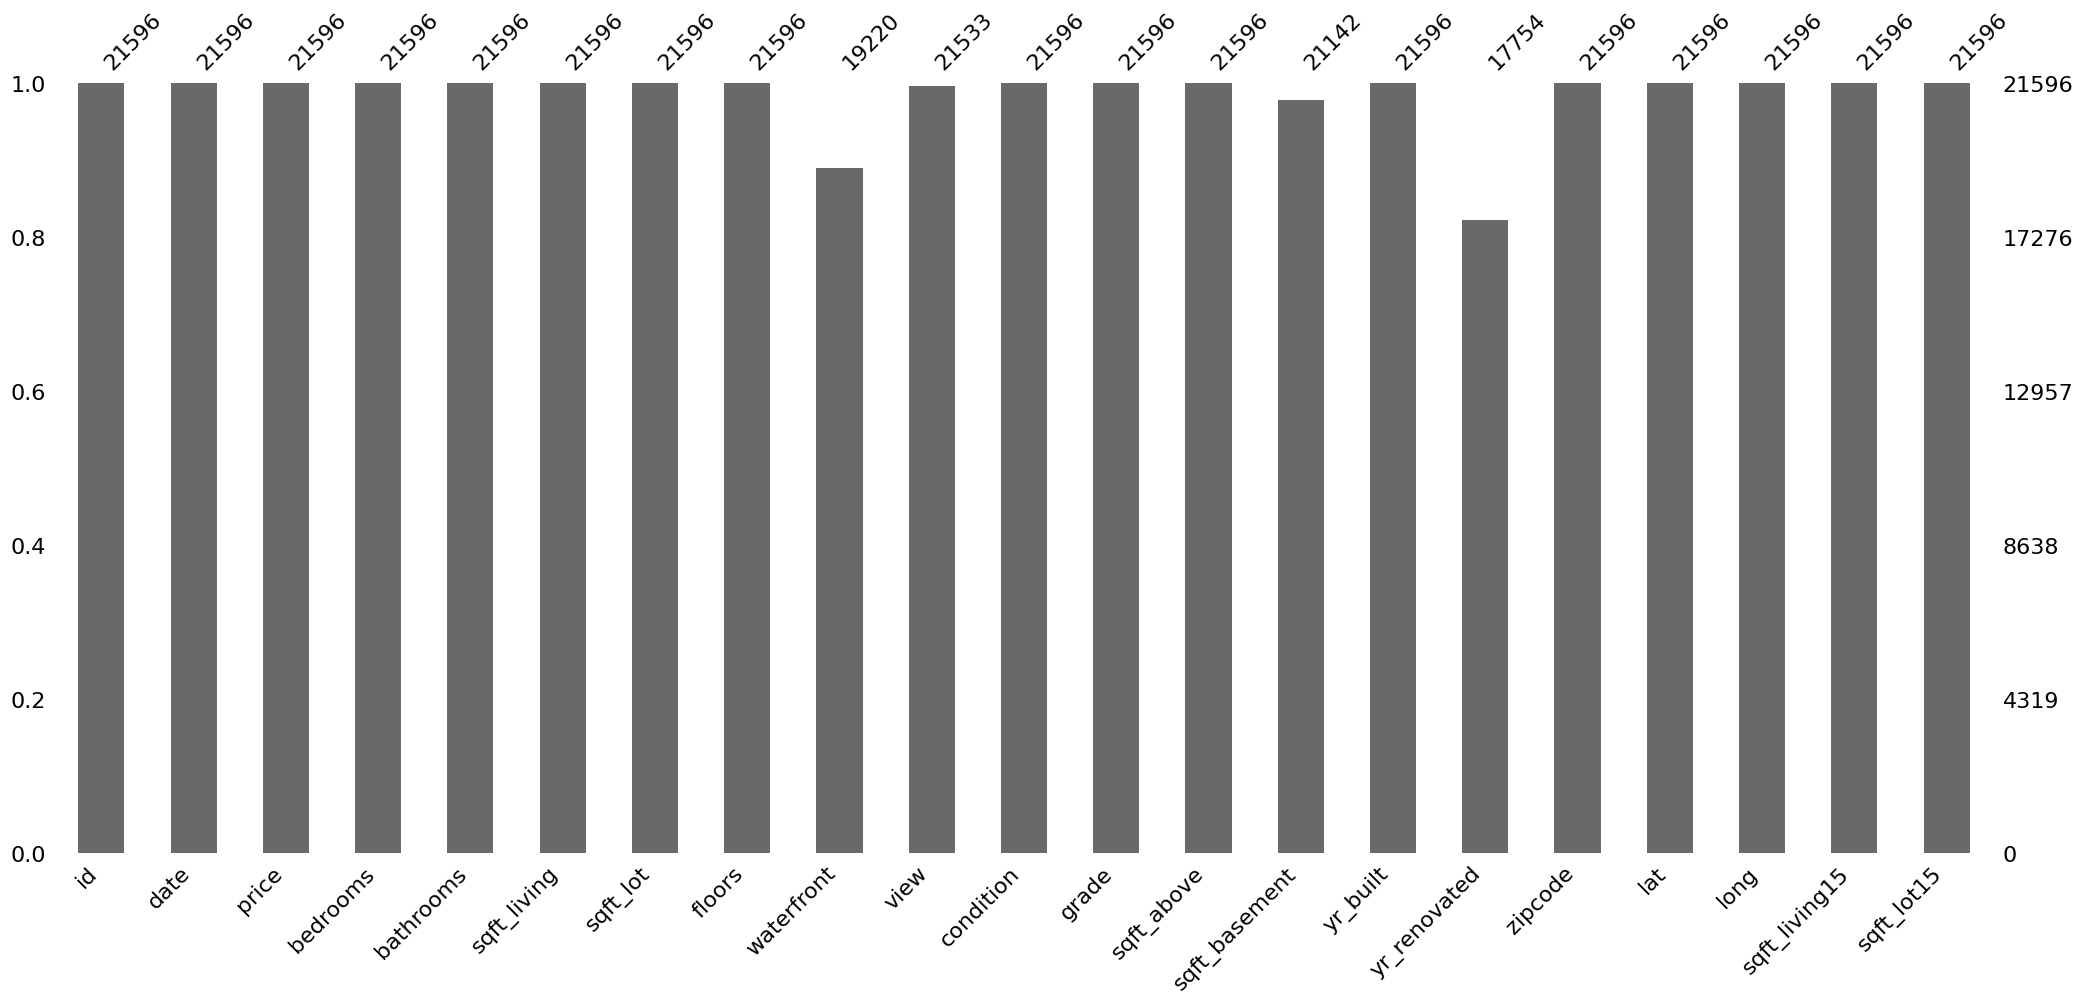

In [26]:
# plotting percentage of missing values per column
msno.bar(df_housing)

<AxesSubplot:>

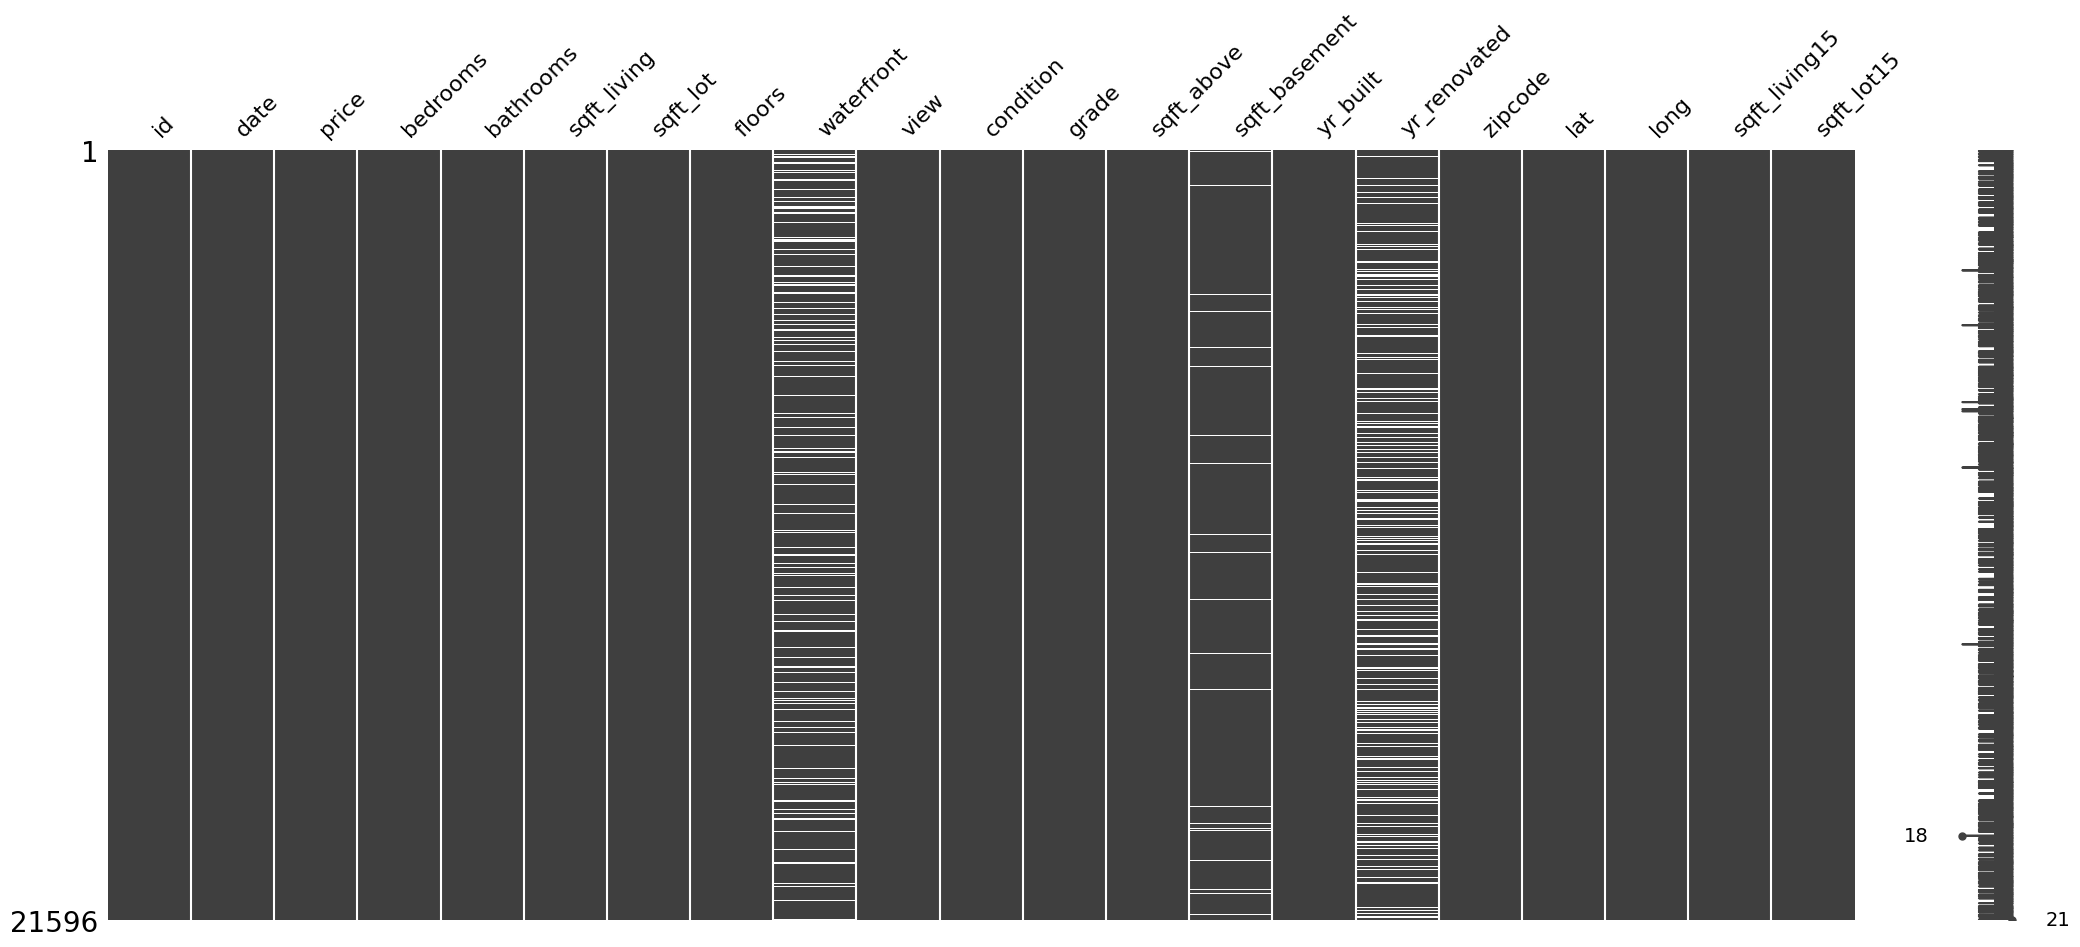

In [27]:
msno.matrix(df_housing)

## categorical data:

- id
- date
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- yr_built
- yr_renovated
- zipcode

## continuous data:

- price
- sqft_above
- sqft_basement
- lat
- long
- sqft_living15
- sqft_lot15

## Research Questions and Hypothesis Generation

### Questions with belonging hypotheses and their indicators:

* Does the location of a house affect the price?
    1. The closer a house is to the city center, the higher the price (geolocation)
    1. If a house is located close to water, then the price is higher (waterfront(yes/no)) 
    1. If the house is located in a "good" zip code, the price is higher (zipcode)

* Does the size of a house affect the price?
    1. The more bedrooms a house has, the higher the price (bedrooms)
    1. The higher the square footage of the house, the higher the price (sqft_liviing)
    1. The more bathrooms the house has, the higher the price
    1. The more floors the house has, the higher the price (floors)
    1. If the house has a basement, the price is higher (sqft_basement)
    
* Does the interest in a house affect the price?
    1. The higher the number of views, the higher the price (view)

* Does the state the house is in affect the price?
    1. The better the overall condition of the house, the higher the price (condition)
    1. The better the grade, the higher the price (grade)
    1. The newer the renovation status, the higher the price (yr_renovated)

### Questions relevant for Client

Client: Larry Sanders, Buyer.
Characteristics: Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

* How to parametrize "nice & isolated but central"? Assumptions:
    1. research zip codes, which are close to center? Population density?
    1. condition could be an indicator for a "nice" house
    1. Assumption: Isolated: Refers to sqft_lot size, some e.g. lawn surrounding the house? and sqft_lot15

* Assumption: Has several kids, hence needs a house with at least 2 bedrooms. 

* Are there houses that meet all the criteria?
    1. Are there limited budget houses at the waterfront?
    1. Are there isolated but central houses?


* Room for kids: Does the size of a house affect the price?
    1. The more bedrooms a house has, the higher the price (bedrooms)

* Nice house: Does the state the house is in affect the price?
    1. The better the overall condition of the house, the higher the price (condition)
    1. The better the grade, the higher the price (grade)
    1. The newer the renovation status, the higher the price (yr_renovated)

* Waterfront, central: Does the location of a house affect the price?
    1. The closer a house is to the city center, the higher the price (geolocation, zipcode)
    1. If a house is located at the waterfront, then the price is higher (waterfront(yes/no)) 

* Does the size of the lot affect the price?
    1. The larger the lot, the higher the price. (sqft_lot; Assumption: Isolated: Refers to sqft_lot size, some e.g. lawn surrounding the house?)

* Isolated: Look at sqft_lot and sqft_lot15? Starting where isolated?
* No kids: Maybe school info per zip code?
* Limited budget: Are there houses that meet all the criteria? Assumption: Below or up to median or some other percentile?

* Grade: Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)
* view An index from 0 to 4 of how good the view of the property was
condition Condition of the house, ranked from 1 to 5

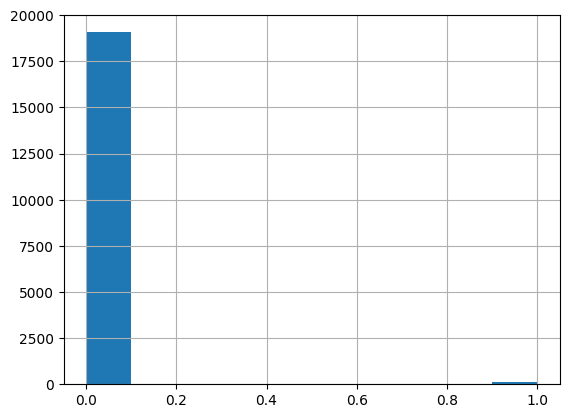

In [28]:
# how are the houses with(out) waterfront distributed?
df_housing.waterfront.hist();

<AxesSubplot:title={'center':'Waterfront Yes/No'}>

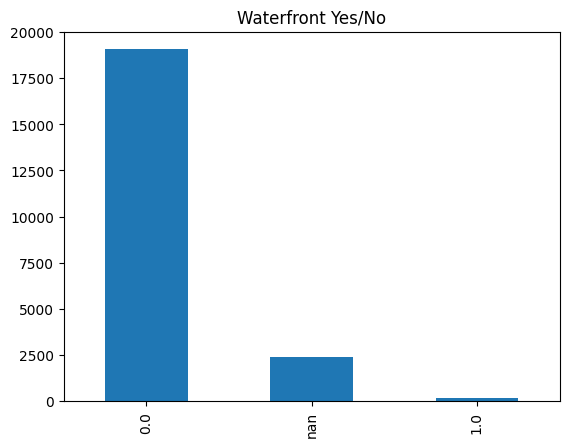

In [29]:
counts_waterfront = df_housing.waterfront.value_counts(dropna=False)
counts_waterfront.plot.bar(title='Waterfront Yes/No')
#plt.hist(df_housing.waterfront.replace(np.nan, "unknown"))

In [30]:
#number of waterfront houses compared to total:
waterfront_houses = (df_housing.waterfront.values == 1).sum()
total_houses = df_housing.shape[0]
print(f"There are {waterfront_houses} waterfront houses and {total_houses} houses in total. Hence, only {waterfront_houses/total_houses * 100} % of the houses are waterfront houses. This wish highly restricts the available houses.")

There are 146 waterfront houses and 21596 houses in total. Hence, only 0.6760511205778849 % of the houses are waterfront houses. This wish highly restricts the available houses.


In [31]:
cor_price_water = df_housing.price.corr(df_housing.waterfront)
cor_price_water

0.2762971436073727

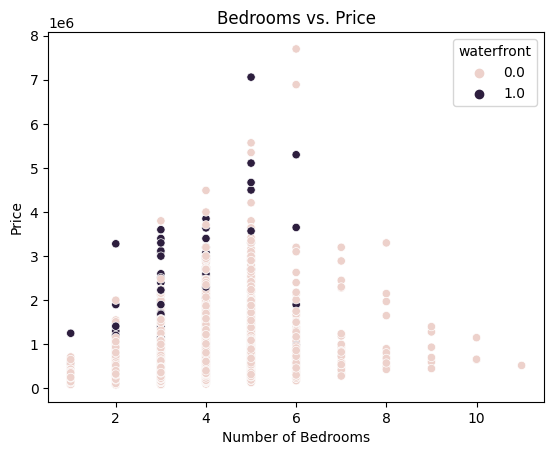

In [32]:
# Hypothesis: The more bedrooms a house has, the higher the price (bedrooms)
sns.scatterplot(data=df_housing, x='bedrooms', y='price', hue="waterfront")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price');

In [33]:
df_housing.groupby("waterfront", dropna=False).count()
#df_housing.query("waterfront == np.NaN")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,,
0.000,19074,19074,19074,19074,19074,19074,19074,19074,19018,19074,19074,19074,18661,19074,15687,19074,19074,19074,19074,19074
1.000,146,146,146,146,146,146,146,146,145,146,146,146,142,146,121,146,146,146,146,146
NaN,2376,2376,2376,2376,2376,2376,2376,2376,2370,2376,2376,2376,2339,2376,1946,2376,2376,2376,2376,2376


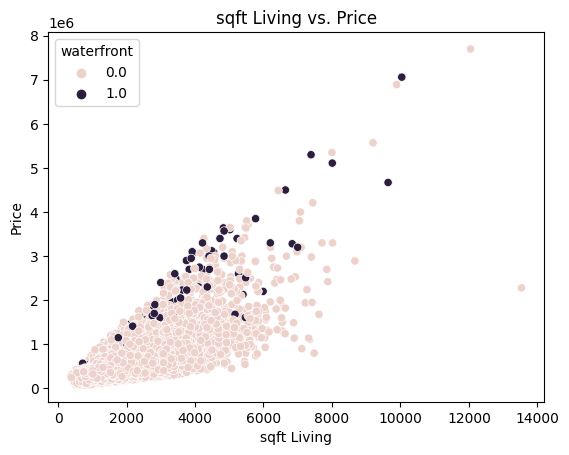

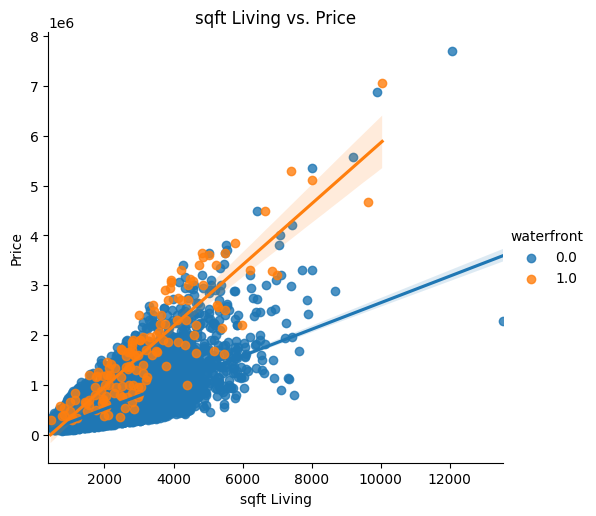

In [34]:
sns.scatterplot(data=df_housing, x='sqft_living', y='price', hue="waterfront")
plt.xlabel('sqft Living')
plt.ylabel('Price')
plt.title('sqft Living vs. Price');
sns.lmplot(data=df_housing, x='sqft_living', y='price', hue="waterfront")
plt.xlabel('sqft Living')
plt.ylabel('Price')
plt.title('sqft Living vs. Price');

In [35]:
df_housing.groupby("waterfront")["price", "bedrooms"].describe()
#bedroom data comparable at/away from waterfront
#price is higher when at waterfront

/var/folders/xc/hzxkdm6x30g7x6m188q7h66h0000gn/T/ipykernel_1826/894265352.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_housing.groupby("waterfront")["price", "bedrooms"].describe()


price                                                \
               count        mean         std        min        25%   
waterfront                                                           
0.000      19074.000  532636.358  344967.345  78000.000 320000.000   
1.000        146.000 1717214.726 1145384.857 285000.000 827500.000   

                                                bedrooms                    \
                   50%         75%         max     count  mean   std   min   
waterfront                                                                   
0.000       450000.000  638500.000 7700000.000 19074.000 3.373 0.902 1.000   
1.000      1510000.000 2282500.000 7060000.000   146.000 3.349 1.099 1.000   

                                     
             25%   50%   75%    max  
waterfront                           
0.000      3.000 3.000 4.000 11.000  
1.000      3.000 3.000 4.000  6.000

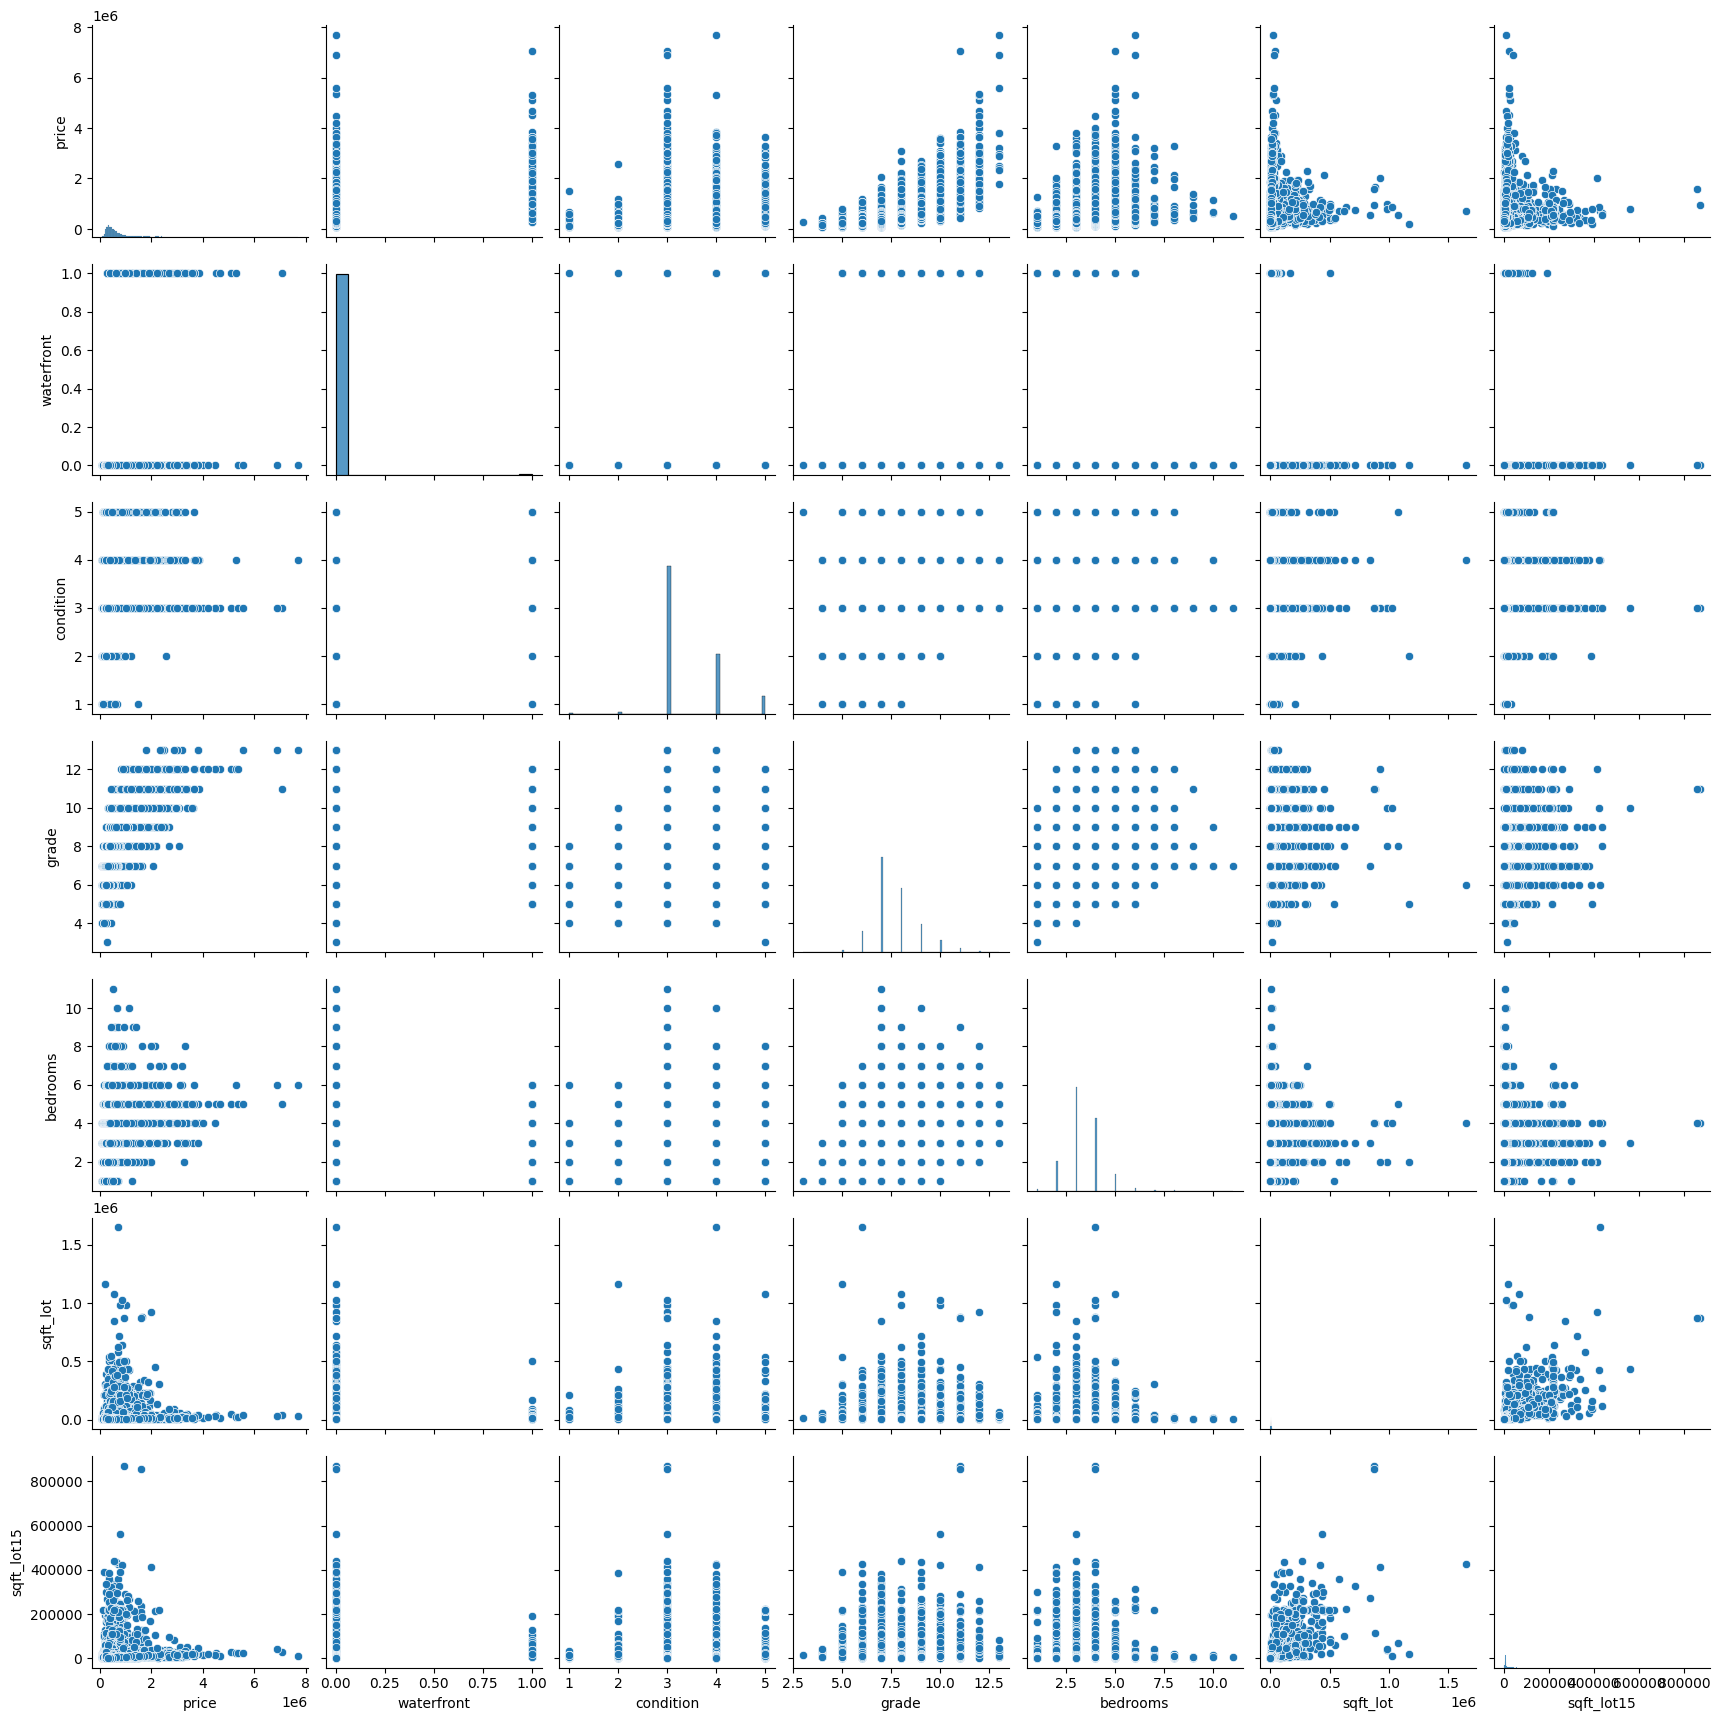

In [36]:
#pd.plotting.scatter_matrix(df_housing[["price", "waterfront", "condition", "grade", "bedrooms", "sqft_lot"]]);
sns.pairplot(df_housing[["price", "waterfront", "condition", "grade", "bedrooms", "sqft_lot", "sqft_lot15"]], dropna=False)

In [37]:
#add column price per sqft_living
df_housing["price_per_sqft_living"] = df_housing.price / df_housing.sqft_living

In [38]:
df_housing.corr().style.bar(align='zero',color=["orange"])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.004180,0.011581,-0.023721,0.008169,-0.010831,-0.004525,0.021589,-0.012019,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.005203
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.276297,0.395739,0.036031,0.667964,0.605392,0.325003,0.053965,0.129603,-0.053409,0.306687,0.022047,0.585267,0.082849,0.556060
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002303,0.080922,0.023440,0.366174,0.492543,0.309298,0.160736,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.212775
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.067281,0.186446,-0.126443,0.665834,0.686664,0.282712,0.507166,0.051044,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.090263
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.110228,0.282528,-0.059397,0.762776,0.876448,0.434598,0.318140,0.055654,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.091142
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.023142,0.075295,-0.008806,0.114726,0.184134,0.015540,0.052939,0.004511,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.034738
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.021879,0.028424,-0.264013,0.458783,0.523970,-0.245123,0.489175,0.003525,-0.059522,0.049280,0.125912,0.280072,-0.010734,0.004702
waterfront,-0.004180,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.406654,0.017656,0.087381,0.075460,0.090204,-0.026083,0.087243,0.031059,-0.012768,-0.039869,0.088858,0.032000,0.197245
view,0.011581,0.395739,0.080922,0.186446,0.282528,0.075295,0.028424,0.406654,1.000000,0.045776,0.249721,0.166290,0.276534,-0.054577,0.100960,0.085284,0.006154,-0.077907,0.279554,0.073328,0.221309
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.017656,0.045776,1.000000,-0.146854,-0.158826,0.170923,-0.361555,-0.061840,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,0.103096


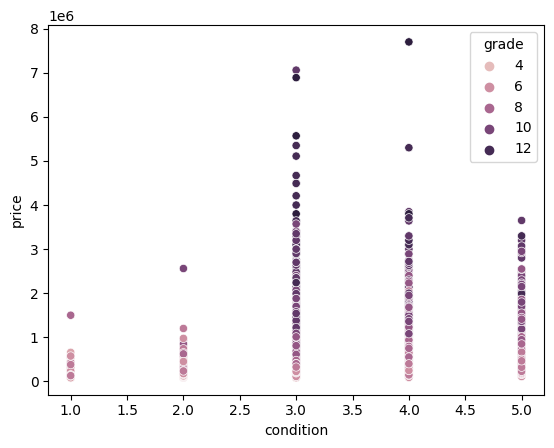

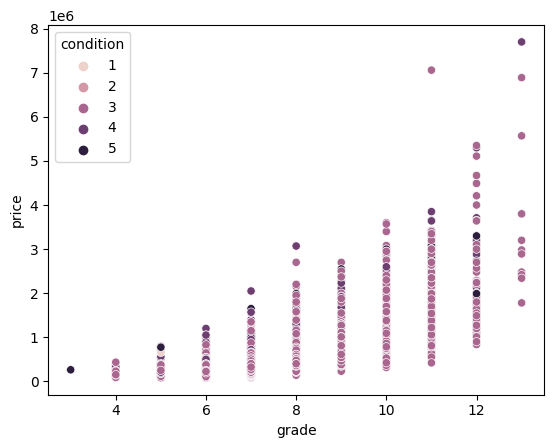

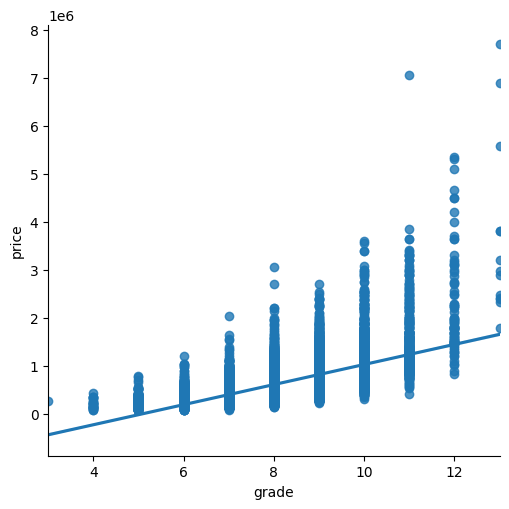

In [39]:
# Hypothesis: The better the overall condition /the higher the grade of the house, the higher the price
sns.scatterplot(data=df_housing, x='condition', y='price', hue="grade")
plt.show()
sns.scatterplot(data=df_housing, x='grade', y='price', hue="condition")
plt.show()
sns.lmplot(data=df_housing, x='grade', y='price')#, hue="condition");

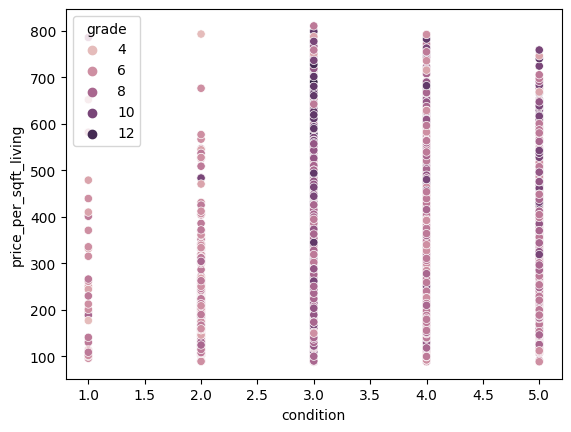

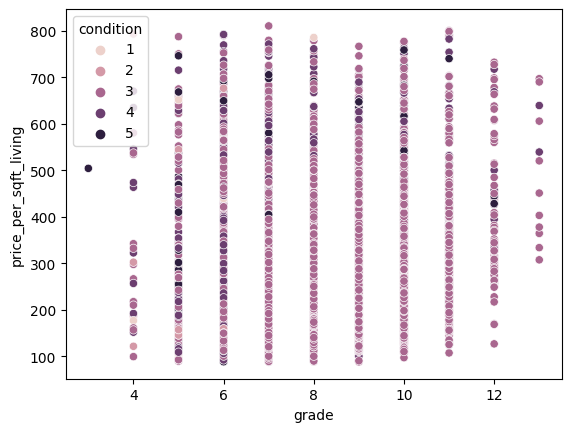

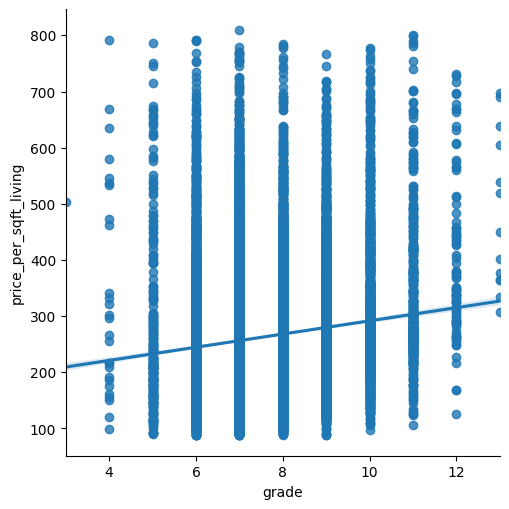

In [40]:
# Hypothesis: The better the overall condition /the higher the grade of the house, the higher the price
sns.scatterplot(data=df_housing, x='condition', y='price_per_sqft_living', hue="grade")
plt.show()
sns.scatterplot(data=df_housing, x='grade', y='price_per_sqft_living', hue="condition")
plt.show()
sns.lmplot(data=df_housing, x='grade', y='price_per_sqft_living')#, hue="condition");

In [41]:
df_housing.query("sqft_living > sqft_lot")#.value_counts()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
63,9528102996,2014-12-07,549000.000,3,1.750,1540,1044,3.000,0.000,0.000,...,1540,0.000,2014,0.000,98115,47.676,-122.320,1580,3090,356.494
116,3362400431,2014-06-26,518500.000,3,3.500,1590,1102,3.000,0.000,0.000,...,1590,0.000,2010,0.000,98103,47.682,-122.347,1620,3166,326.101
175,7234600798,2015-02-10,425000.000,3,2.500,1120,1100,2.000,0.000,0.000,...,820,300.000,2008,0.000,98122,47.611,-122.310,1590,1795,379.464
406,7821200390,2014-08-06,450000.000,3,2.000,1290,1213,3.000,0.000,0.000,...,1290,0.000,2001,0.000,98103,47.661,-122.344,1290,3235,348.837
547,7899800860,2015-03-19,259950.000,2,2.000,1070,649,2.000,0.000,0.000,...,720,350.000,2008,0.000,98106,47.521,-122.357,1070,928,242.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,1972201967,2014-10-31,520000.000,2,2.250,1530,981,3.000,0.000,0.000,...,1480,50.000,2006,NaN,98103,47.653,-122.346,1530,1282,339.869
21584,5100403806,2015-04-07,467000.000,3,2.500,1425,1179,3.000,0.000,0.000,...,1425,0.000,2008,0.000,98125,47.696,-122.318,1285,1253,327.719
21587,9834201367,2015-01-26,429000.000,3,2.000,1490,1126,3.000,0.000,0.000,...,1490,0.000,2014,0.000,98144,47.570,-122.288,1400,1230,287.919
21590,2997800021,2015-02-19,475000.000,3,2.500,1310,1294,2.000,0.000,0.000,...,1180,130.000,2008,0.000,98116,47.577,-122.409,1330,1265,362.595


## Answers to Hypotheses

1. the price is higher for houses at the waterfront. Yes.
1. the more bedrooms, the higher the price: true for waterfront housing. Only true up to and including 5 bedrooms in general
1. The better the overall condition /the higher the grade of the house, the higher the price. True for price/grade: correlation of 0.667951. not true for price/condition: correlation of 0.036056
1.

## Assumptions for Larry:

* Condition: An index from 1 to 5 on the condition of the apartment (overall). 
Seems to be no correlation, but for Larry we can decide on only looking at Condition 3 and up
since he wants a nice house

* Grade: An index from 1 to 13, 
where 1-3 falls short of building construction and design, 
7 has an average level of construction and design, 
and 11-13 have a high quality level of construction and design.
Highly correlated to price. For Larry, we will only consider grade 7 and up housing since he wants a nice house

* Isolated housing


In [42]:
#dropping columns not of relevance to Larry's needs
df_Larry = df_housing.drop(['bathrooms', 'floors', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'], axis = 1)
df_Larry

,id,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,7129300520,2014-10-13,221900.000,3,1180,5650,NaN,3,7,98178,47.511,-122.257,1340,5650,188.051
1,6414100192,2014-12-09,538000.000,3,2570,7242,0.000,3,7,98125,47.721,-122.319,1690,7639,209.339
2,5631500400,2015-02-25,180000.000,2,770,10000,0.000,3,6,98028,47.738,-122.233,2720,8062,233.766
3,2487200875,2014-12-09,604000.000,4,1960,5000,0.000,5,7,98136,47.521,-122.393,1360,5000,308.163
4,1954400510,2015-02-18,510000.000,3,1680,8080,0.000,3,8,98074,47.617,-122.045,1800,7503,303.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,263000018,2014-05-21,360000.000,3,1530,1131,0.000,3,8,98103,47.699,-122.346,1530,1509,235.294
21592,6600060120,2015-02-23,400000.000,4,2310,5813,0.000,3,8,98146,47.511,-122.362,1830,7200,173.160
21593,1523300141,2014-06-23,402101.000,2,1020,1350,0.000,3,7,98144,47.594,-122.299,1020,2007,394.217
21594,291310100,2015-01-16,400000.000,3,1600,2388,NaN,3,8,98027,47.535,-122.069,1410,1287,250.000


In [57]:
# get schools per zip code
%store -r dict_school_zip
print(dict_school_zip)
# get population density rank of zipcodes
%store -r dict_pop_rk
print(dict_pop_rk)
%store -r df_pop_density_short

{98001: 11, 98002: 16, 98003: 19, 98004: 10, 98005: 6, 98006: 12, 98007: 11, 98008: 12, 98010: 2, 98011: 14, 98014: 5, 98019: 3, 98022: 9, 98023: 12, 98024: 2, 98027: 8, 98028: 6, 98029: 5, 98030: 8, 98031: 10, 98032: 7, 98033: 18, 98034: 16, 98038: 9, 98039: 3, 98040: 12, 98042: 14, 98045: 4, 98047: 1, 98051: 1, 98052: 16, 98053: 10, 98055: 3, 98056: 6, 98057: 7, 98058: 12, 98059: 10, 98065: 8, 98070: 5, 98072: 8, 98074: 9, 98075: 7, 98077: 4, 98092: 17, 98101: 1, 98102: 5, 98103: 16, 98104: 1, 98105: 6, 98106: 6, 98107: 4, 98108: 9, 98109: 6, 98112: 9, 98115: 20, 98116: 9, 98117: 8, 98118: 14, 98119: 5, 98121: 4, 98122: 14, 98124: 1, 98125: 12, 98126: 6, 98133: 13, 98134: 3, 98136: 1, 98144: 12, 98146: 11, 98148: 8, 98155: 12, 98166: 6, 98168: 11, 98177: 2, 98178: 7, 98188: 6, 98195: 3, 98198: 11, 98199: 4, 98288: 1}
{98164: 1, 98174: 2, 98121: 3, 98101: 4, 98104: 5, 98102: 6, 98122: 7, 98109: 8, 98107: 9, 98103: 10, 98119: 11, 98117: 12, 98105: 13, 98116: 14, 98133: 15, 98007: 16, 9

In [58]:
pd.Series(dict_school_zip.values()).value_counts().describe()

count   19.000
mean     4.211
std      2.440
min      1.000
25%      2.000
50%      4.000
75%      5.500
max      9.000
dtype: float64

In [59]:
np.unique(np.array(sorted(dict_school_zip.values())))


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20])

In [60]:
sorted(dict_school_zip.values())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 17,
 18,
 19,
 20]

In [61]:
df_Larry['density_rank']= df_Larry.zipcode.map(dict_pop_rk)
df_Larry['schools_per_zip'] = df_Larry.zipcode.map(dict_school_zip)
df_Larry

,id,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,density_rank,schools_per_zip
0,7129300520,2014-10-13,221900.000,3,1180,5650,NaN,3,7,98178,47.511,-122.257,1340,5650,188.051,33.000,7
1,6414100192,2014-12-09,538000.000,3,2570,7242,0.000,3,7,98125,47.721,-122.319,1690,7639,209.339,19.000,12
2,5631500400,2015-02-25,180000.000,2,770,10000,0.000,3,6,98028,47.738,-122.233,2720,8062,233.766,41.000,6
3,2487200875,2014-12-09,604000.000,4,1960,5000,0.000,5,7,98136,47.521,-122.393,1360,5000,308.163,23.000,1
4,1954400510,2015-02-18,510000.000,3,1680,8080,0.000,3,8,98074,47.617,-122.045,1800,7503,303.571,53.000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,263000018,2014-05-21,360000.000,3,1530,1131,0.000,3,8,98103,47.699,-122.346,1530,1509,235.294,10.000,16
21592,6600060120,2015-02-23,400000.000,4,2310,5813,0.000,3,8,98146,47.511,-122.362,1830,7200,173.160,25.000,11
21593,1523300141,2014-06-23,402101.000,2,1020,1350,0.000,3,7,98144,47.594,-122.299,1020,2007,394.217,20.000,12
21594,291310100,2015-01-16,400000.000,3,1600,2388,NaN,3,8,98027,47.535,-122.069,1410,1287,250.000,64.000,8


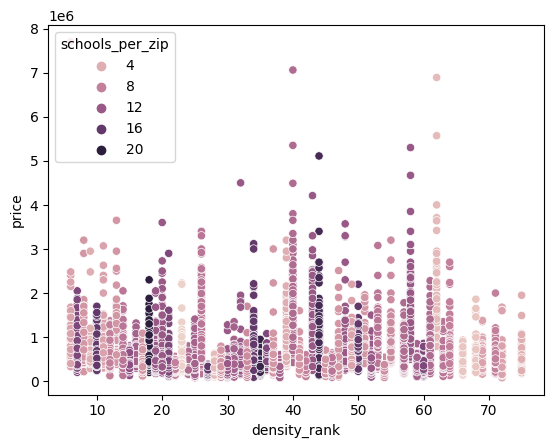

In [62]:
sns.scatterplot(data=df_Larry, x='density_rank', y='price', hue='schools_per_zip');

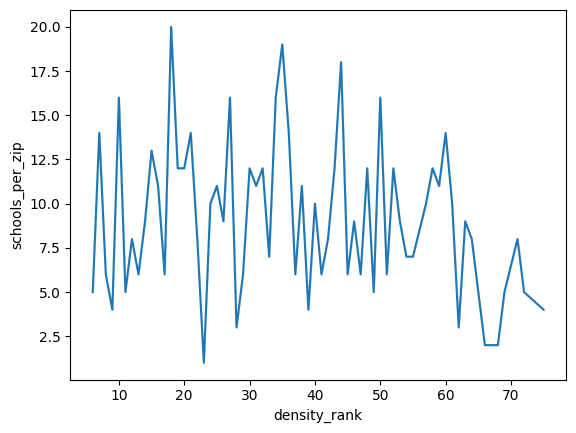

In [63]:
sns.lineplot(data=df_Larry, x='density_rank', y='schools_per_zip');

In [64]:
df_Larry.corr().style.bar(align='zero',color=["orange"])

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,density_rank,schools_per_zip
id,1.000000,-0.016763,0.002328,-0.012258,-0.131920,-0.004180,-0.023721,0.008169,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.005203,0.001511,0.047293
price,-0.016763,1.000000,0.315961,0.701929,0.089879,0.276297,0.036031,0.667964,-0.053409,0.306687,0.022047,0.585267,0.082849,0.556060,0.010035,-0.045561
bedrooms,0.002328,0.315961,1.000000,0.593178,0.033602,-0.002303,0.023440,0.366174,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.212775,0.149394,0.026185
sqft_living,-0.012258,0.701929,0.593178,1.000000,0.173449,0.110228,-0.059397,0.762776,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.091142,0.259659,-0.044712
sqft_lot,-0.131920,0.089879,0.033602,0.173449,1.000000,0.023142,-0.008806,0.114726,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.034738,0.247683,-0.092863
waterfront,-0.004180,0.276297,-0.002303,0.110228,0.023142,1.000000,0.017656,0.087381,0.031059,-0.012768,-0.039869,0.088858,0.032000,0.197245,0.031437,-0.020472
condition,-0.023721,0.036031,0.023440,-0.059397,-0.008806,0.017656,1.000000,-0.146854,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,0.103096,-0.076289,0.038802
grade,0.008169,0.667964,0.366174,0.762776,0.114726,0.087381,-0.146854,1.000000,-0.185761,0.113602,0.200324,0.713863,0.120974,0.125235,0.190356,-0.041483
zipcode,-0.008195,-0.053409,-0.158588,-0.199793,-0.129582,0.031059,0.002835,-0.185761,1.000000,0.266729,-0.564253,-0.279286,-0.147288,0.172732,-0.494257,-0.138204
lat,-0.001766,0.306687,-0.011595,0.052178,-0.085507,-0.012768,-0.015209,0.113602,0.266729,1.000000,-0.135340,0.048721,-0.086129,0.472490,-0.341927,0.008057


## A Function for Larry
points for:

* waterfront yes
* limited budget: price not larger than median (not mean since too highly influenced by extreme values), i.e. 450000 $
* nice: 
    - Condition: An index from 1 to 5 on the condition of the apartment (overall). Seems to be no correlation, but for Larry we can decide on only looking at Condition 3 and up since he wants a nice house.
    - Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Highly correlated to price. For Larry, we will only consider grade 7 and up housing since he wants a nice house.
    - to weigh every wish equally, both measure 0.5
* isolated: 
    - sqft_lot above median so that house has above average distance to neighbor, i.e. 7619 sqft
    - sqft_lot15 above median so that 15 nearest neighbors also have above average distance, i.e. 7620 sqft
    - to weigh every wish equally, both measure 0.5
* central: when in top 15 (or max_rank) population density zip codes, i.e. if density_rank <= 15
* room for kids: bedrooms >= 2
* neighborhood without kids: no more than 2 (1st quartile) schools in the zip code

In [65]:
# collect numbers needed for function
price_limit = df_housing.price.median()
price_limit

450000.0

In [66]:
lot_min = df_housing.sqft_lot.median()
lot_min

7619.0

In [67]:
lot15_min = df_housing.sqft_lot15.median()
lot15_min

7620.0

In [72]:
#list of top 15 population density rank zip codes
# truncate DataFrame after top 15
df_pop_density_short[:15]
# add zip entries to list
ls_central = df_pop_density_short[:15].zip.tolist()
ls_central

[98164,
 98174,
 98121,
 98101,
 98104,
 98102,
 98122,
 98109,
 98107,
 98103,
 98119,
 98117,
 98105,
 98116,
 98133]

In [77]:
def larrys_wishes(waterfront, price, condition, grade, sqft_lot, sqft_lot15, density_rank, bedrooms, schools_per_zip, price_limit=450000, lot_min=7619, lot15_min=7620.0, max_rank=15, max_schools=2):
    points = 0
    if waterfront == 1:
        points += 1
    if price <= price_limit:
        points += 1
    if condition >= 3:
        points += 0.5
    if grade >=7:
        points += 0.5
    if sqft_lot > lot_min:
        points += 0.5
    if sqft_lot15 > lot15_min:
        points += 0.5
    if density_rank <= max_rank:
        points += 1
    if bedrooms >= 2:
        points += 1
    if schools_per_zip <= max_schools:
        points += 1
    return points

In [78]:
df_Larry["wish_points"] = df_Larry.apply(lambda row: larrys_wishes(row.waterfront, row.price, row.condition, row.grade, row.sqft_lot, row.sqft_lot15, row.density_rank, row.bedrooms, row.schools_per_zip), axis=1)

In [79]:
df_Larry.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,density_rank,schools_per_zip,wish_points
0,7129300520,2014-10-13,221900.000,3,1180,5650,NaN,3,7,98178,47.511,-122.257,1340,5650,188.051,33.000,7,3.000
1,6414100192,2014-12-09,538000.000,3,2570,7242,0.000,3,7,98125,47.721,-122.319,1690,7639,209.339,19.000,12,2.500
2,5631500400,2015-02-25,180000.000,2,770,10000,0.000,3,6,98028,47.738,-122.233,2720,8062,233.766,41.000,6,3.500
3,2487200875,2014-12-09,604000.000,4,1960,5000,0.000,5,7,98136,47.521,-122.393,1360,5000,308.163,23.000,1,3.000
4,1954400510,2015-02-18,510000.000,3,1680,8080,0.000,3,8,98074,47.617,-122.045,1800,7503,303.571,53.000,9,2.500


In [84]:
df_Larry.describe()['wish_points']

count   21596.000
mean        3.120
std         0.665
min         0.500
25%         3.000
50%         3.000
75%         3.500
max         5.000
Name: wish_points, dtype: float64

In [85]:
# df_Larry.sort_values(['wish_points'], ascending=False).head()

In [81]:
(
df_Larry.groupby("zipcode")
    .mean()
    .sort_values(['wish_points'], ascending=False)
)

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,density_rank,schools_per_zip,wish_points
zipcode,,,,,,,,,,,,,,,,
98010,3879195406.670,423665.990,3.290,2137.590,55465.300,0.000,3.530,7.400,47.333,-121.999,2008.760,47830.270,210.095,66.000,2.000,4.400
98024,2802980843.950,586120.875,3.337,2363.062,102735.438,0.000,3.263,7.612,47.559,-121.905,2134.575,79484.363,252.328,68.000,2.000,4.300
98133,4659695785.554,387011.590,3.138,1614.763,7094.606,0.000,3.542,7.124,47.736,-122.344,1555.073,6730.511,253.971,15.000,13.000,4.174
98177,3934998241.741,676419.392,3.396,2323.333,11904.404,0.004,3.494,7.976,47.742,-122.369,2186.196,11690.239,292.982,NaN,2.000,4.027
98188,4481850951.676,289078.346,3.434,1802.772,10126.081,0.000,3.331,7.037,47.447,-122.281,1636.279,9752.801,169.007,45.000,6.000,3.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98144,4317892586.219,594706.542,3.219,1912.111,4093.624,0.007,3.504,7.455,47.586,-122.298,1757.717,3923.988,312.286,20.000,12.000,2.475
98029,4318198779.788,612642.738,3.427,2284.206,8679.679,0.000,3.140,8.396,47.560,-122.006,2214.268,7045.389,272.069,49.000,5.000,2.397
98115,5457962442.919,619944.149,3.204,1835.295,5444.144,0.002,3.513,7.362,47.685,-122.302,1691.614,5286.475,354.157,18.000,20.000,2.285


The maximum value of points attained by houses sold is 5. A house fulfilling all of Larry's wishes should have 8 points. This means that not a single house meeting all of Larry's criteria has been sold.

Hence, we will relax the conditions in the function in order to get a more realistic picture:
points for:

* waterfront yes
* limited budget: price not larger than median (not mean since too highly influenced by extreme values), i.e. 450000 $
* nice: 
    - Condition: An index from 1 to 5 on the condition of the apartment (overall). Seems to be no correlation, but for Larry we can decide on only looking at Condition 2 and up since he wants a nice house.
    - Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Highly correlated to price. For Larry, we will only consider grade 6 and up housing since he wants a nice house.
    - to weigh every wish equally, both measure 0.5
* isolated: 
    - sqft_lot above 40th percentile so that house has sufficient distance to neighbor, i.e. >= 6745 sqft
    - sqft_lot15 above 40th percentile so that 15 nearest neighbors also have sufficient distance, i.e. >= 6750 sqft
    - to weigh every wish equally, both measure 0.5
* central: when in top 20 (or max_rank) population density zip codes, i.e. if density_rank <= 20
* room for kids: bedrooms >= 2
* neighborhood without kids: no more than 4 (median) schools in the zip code

In [91]:
#get value of 40th percentile of lot size
df_Larry[['sqft_lot', 'sqft_lot15']].quantile(.4)

sqft_lot     6745.000
sqft_lot15   6750.000
Name: 0.4, dtype: float64

In [98]:
def larrys_wishes_rel(waterfront, price, condition, grade, sqft_lot, sqft_lot15, density_rank, bedrooms, schools_per_zip, price_limit=450000, lot_min=6745, lot15_min=6750, max_rank=20, max_schools=4):
    points = 0
    if waterfront == 1:
        points += 1
    if price <= price_limit:
        points += 1
    if condition >= 2:
        points += 0.5
    if grade >=6:
        points += 0.5
    if sqft_lot > lot_min:
        points += 0.5
    if sqft_lot15 > lot15_min:
        points += 0.5
    if density_rank <= max_rank:
        points += 1
    if bedrooms >= 2:
        points += 1
    if schools_per_zip <= max_schools:
        points += 1
    return points

In [96]:
df_Larry["wish_points_rel"] = df_Larry.apply(lambda row: larrys_wishes_rel(row.waterfront, row.price, row.condition, row.grade, row.sqft_lot, row.sqft_lot15, row.density_rank, row.bedrooms, row.schools_per_zip), axis=1)

In [97]:
df_Larry.describe()['wish_points_rel']

count   21596.000
mean        3.426
std         0.693
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         5.000
Name: wish_points_rel, dtype: float64